<a href="https://colab.research.google.com/github/aprendizajecifuentes/Google_Colab_Ejercisios/blob/main/Analisis_Data_Puntuacion_Crediticia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis de Data, Puntuacion crediticia /Edad/Ingresos/Gastos/Region**

## **Ejercicio 1 Sesion 3 Und 9**
Gráfico de Dispersión con Línea de Tendencia

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# URL del archivo CSV (desde Google Drive)
url = "https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I"
df=pd.read_csv(url)

print(df.head(10))

   Cliente_ID  Edad  Ingreso Mensual  Gasto Mensual  Puntuacion de credito  \
0           1    40          9311.00        4668.80                    563   
1           2    35          6773.72         716.97                    591   
2           3    19          6905.44         723.16                    840   
3           4    23          4122.59        6409.51                    487   
4           5    19          3184.45        6186.34                    743   
5           6    29          5577.60        2276.06                    730   
6           7    46          2114.40        4663.47                    453   
7           8    18          2777.56        4016.90                    482   
8           9    37          4880.42        2648.67                    672   
9          10    30          1628.02        6227.40                    820   

  Region  
0  Oeste  
1   Este  
2  Norte  
3   Este  
4  Norte  
5    Sur  
6  Oeste  
7  Oeste  
8    Sur  
9  Norte  


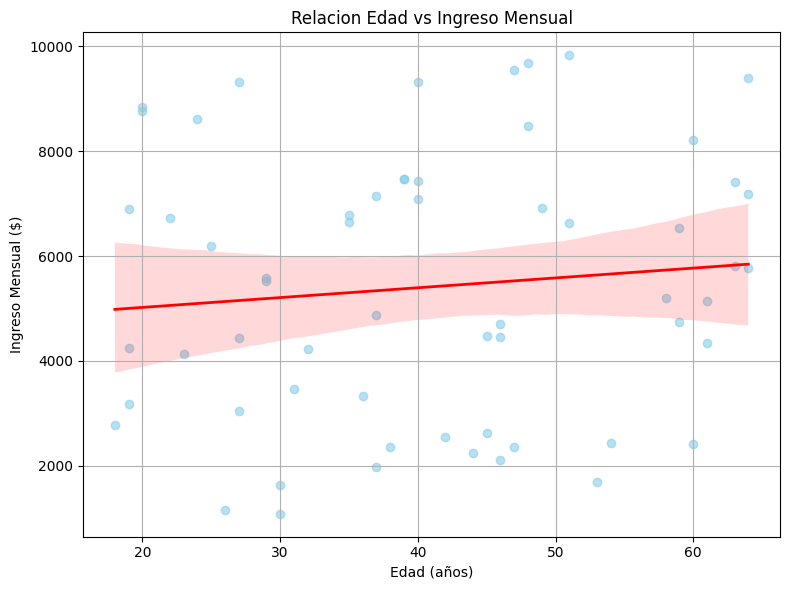

In [ ]:
# Asegurar que las columnas "Edad" e "Ingreso Mensual" están correctamente definidas como valores numéricos.

df["Edad"]= pd.to_numeric(df["Edad"], errors="coerce")
df["Ingreso Mensual"]=pd.to_numeric(df["Ingreso Mensual"])

#Eliminar filas con valores nulos
df=df.dropna(subset=["Edad","Ingreso Mensual"])

#se crea el grafico de dispersion con la linea de tendencia
plt.figure(figsize=(8,6))

#sns.regplot => se crea un grafico de dispersion con linea de regresion de manera automatica

sns.regplot(
    data=df,
    x="Edad",
    y="Ingreso Mensual",
    scatter_kws={"alpha":0.6,"color":"skyblue"},
    line_kws={"color":"red","linewidth":2}
)
#se personaliza el grafico
plt.title("Relacion Edad vs Ingreso Mensual")
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso Mensual ($)")
plt.grid(True)
plt.tight_layout()

#mostramos el grafico
plt.show()



## **Ejercicio 2 Sesion 3 Und 9**
Ajuste de Precio Unitario en Función de las Ventas


Columnas del DataFrame: Index(['Cliente_ID', 'Edad', 'Ingreso Mensual', 'Gasto Mensual',
       'Puntuacion de credito', 'Region'],
      dtype='object')


/tmp/ipython-input-309042947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Gasto Mensual", data=gasto_promedio, palette="Set2")


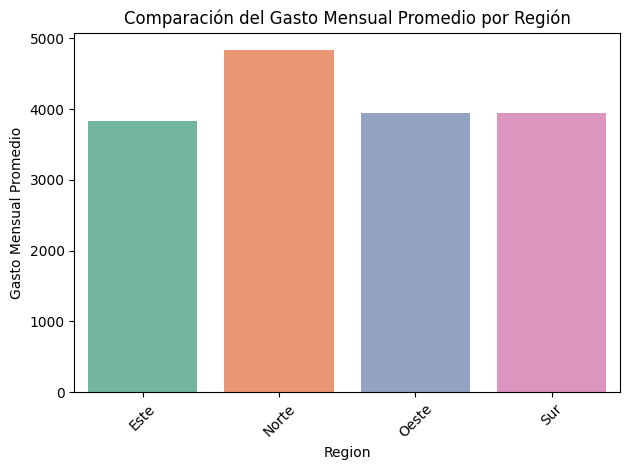

In [ ]:
# Verificar nombres de columnas
print("\nColumnas del DataFrame:", df.columns)

# Convertir a numérico si fuera necesario
df["Gasto Mensual"] = pd.to_numeric(df["Gasto Mensual"], errors='coerce')

# Si existe una subcategoría, por ejemplo "Categoria", la incluimos
if "Categoria" in df.columns:
    gasto_promedio = df.groupby(["Region", "Categoria"])["Gasto Mensual"].mean().reset_index()
else:
    gasto_promedio = df.groupby("Region")["Gasto Mensual"].mean().reset_index()


    # Si existen subcategorías
if "Categoria" in gasto_promedio.columns:
    tabla_pivot = gasto_promedio.pivot(index="Region", columns="Categoria", values="Gasto Mensual")

    # Crear gráfico apilado
    tabla_pivot.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")

else:
    # Si no hay subcategorías, solo graficamos barras simples
    sns.barplot(x="Region", y="Gasto Mensual", data=gasto_promedio, palette="Set2")
    plt.title("Gasto Mensual Promedio por Región")
    plt.xlabel("Region")
    plt.ylabel("Gasto Mensual Promedio")
    plt.xticks(rotation=45)

plt.title("Comparación del Gasto Mensual Promedio por Región")
plt.tight_layout()
plt.show()

## **Ejercicio 3 Sesion 3 Und 9**
Ajuste de Precio Unitario en Función de las Ventas

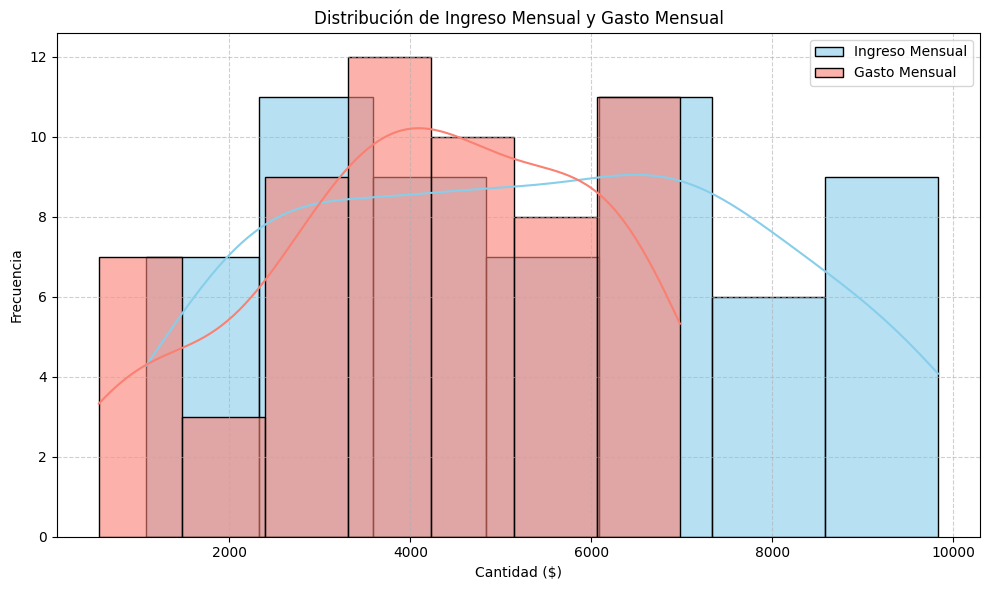

In [ ]:
# Asegurar que las columnas "Ingreso Mensual" y "Gasto Mensual" están correctamente definidas como valores numéricos.
df["Ingreso Mensual"] = pd.to_numeric(df["Ingreso Mensual"], errors="coerce")
df["Gasto Mensual"] = pd.to_numeric(df["Gasto Mensual"], errors="coerce")

# Eliminar filas con valores nulos después de la conversión si es necesario
df.dropna(subset=["Ingreso Mensual", "Gasto Mensual"], inplace=True)

# Crear el histograma doble
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="Ingreso Mensual", color="skyblue", label="Ingreso Mensual", kde=True, alpha=0.6)
sns.histplot(data=df, x="Gasto Mensual", color="salmon", label="Gasto Mensual", kde=True, alpha=0.6)

# Personalizar el gráfico
plt.title("Distribución de Ingreso Mensual y Gasto Mensual")
plt.xlabel("Cantidad ($)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **Ejercicio 3 Sesion 3 Und 9**
Ajuste de Precio Unitario en Función de las Ventas


Tipos de datos:
Cliente_ID                 int64
Edad                       int64
Ingreso Mensual          float64
Gasto Mensual            float64
Puntuacion de credito      int64
Region                    object
dtype: object


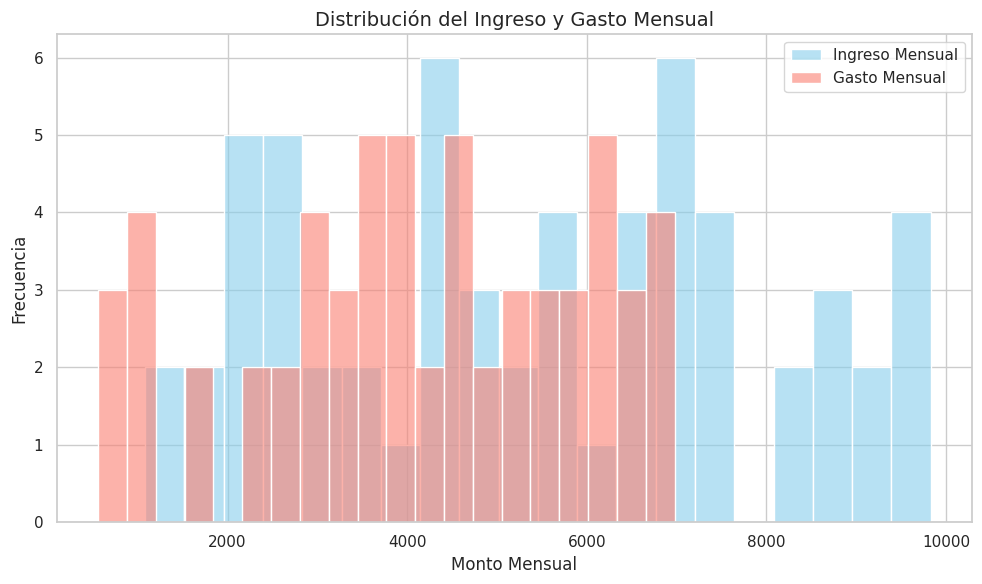

In [ ]:
# Convertir las columnas a tipo numérico
df["Ingreso Mensual"] = pd.to_numeric(df["Ingreso Mensual"], errors='coerce')
df["Gasto Mensual"] = pd.to_numeric(df["Gasto Mensual"], errors='coerce')

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Estilo del gráfico
sns.set(style="whitegrid")

# Crear el histograma doble
plt.figure(figsize=(10,6))

sns.histplot(df["Ingreso Mensual"],
             bins=20,
             color="skyblue",
             label="Ingreso Mensual",
             alpha=0.6)

sns.histplot(df["Gasto Mensual"],
             bins=20,
             color="salmon",
             label="Gasto Mensual",
             alpha=0.6)

# Personalizar el gráfico
plt.title("Distribución del Ingreso y Gasto Mensual", fontsize=14)
plt.xlabel("Monto Mensual")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **Ejercicio 4 Sesion 3 Und 9**
Ajuste de Precio Unitario en Función de las Ventas

Datos cargados:
   Cliente_ID  Edad  Ingreso Mensual  Gasto Mensual  Puntuacion de credito  \
0           1    40          9311.00        4668.80                    563   
1           2    35          6773.72         716.97                    591   
2           3    19          6905.44         723.16                    840   
3           4    23          4122.59        6409.51                    487   
4           5    19          3184.45        6186.34                    743   

  Region  
0  Oeste  
1   Este  
2  Norte  
3   Este  
4  Norte  

Tipos de datos:
Cliente_ID                 int64
Edad                       int64
Ingreso Mensual          float64
Gasto Mensual            float64
Puntuacion de credito      int64
Region                    object
dtype: object


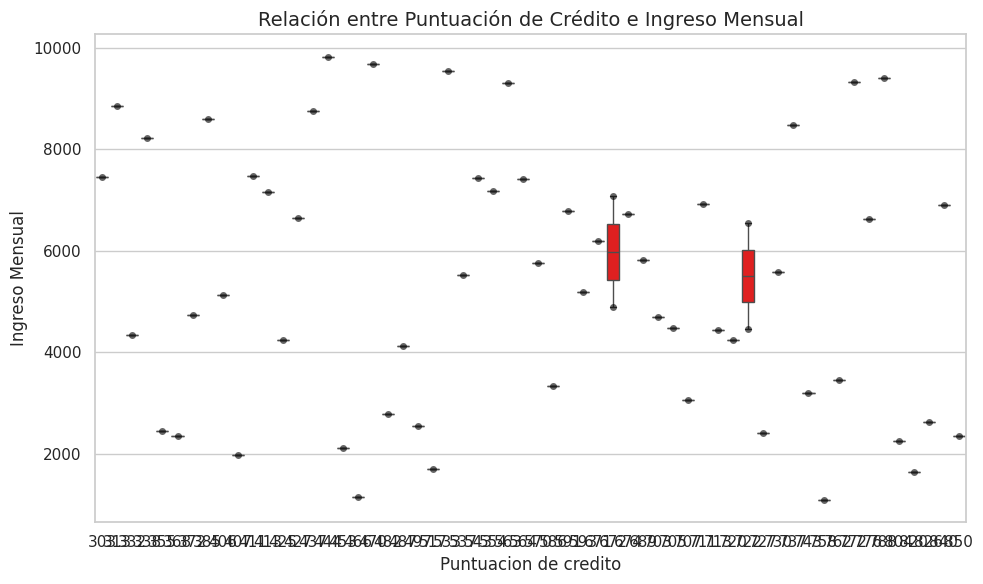

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I"

# Cargar los datos en un DataFrame
df = pd.read_csv(url)

# Mostrar las primeras filas para inspección
print("Datos cargados:")
print(df.head())

# Convertir columnas a numérico
df["Puntuacion de credito"] = pd.to_numeric(df["Puntuacion de credito"], errors='coerce')
df["Ingreso Mensual"] = pd.to_numeric(df["Ingreso Mensual"], errors='coerce')

# Verificar los tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Estilo visual
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Boxplot
sns.boxplot(
    x="Puntuacion de credito",
    y="Ingreso Mensual",
    data=df,
    color="red"
)

# Swarmplot superpuesto
sns.swarmplot(
    x="Puntuacion de credito",
    y="Ingreso Mensual",
    data=df,
    color="black",
    alpha=0.6
)

# Personalización del gráfico
plt.title("Relación entre Puntuación de Crédito e Ingreso Mensual", fontsize=14)
plt.xlabel("Puntuacion de credito")
plt.ylabel("Ingreso Mensual")
plt.tight_layout()

# Mostrar gráfico
plt.show()




## **Ejercicio 5 Sesion 3 Und 9**
Ajuste de Precio Unitario en Función de las Ventas

In [ ]:
# Convertir columnas a tipo numérico
df["Edad"] = pd.to_numeric(df["Edad"], errors='coerce')
df["Ingreso Mensual"] = pd.to_numeric(df["Ingreso Mensual"], errors='coerce')

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Crear una nueva columna con los grupos de edad
df["Grupo de Edad"] = pd.cut(
    df["Edad"],
    bins=[18, 30, 50, 65],
    labels=["Jóvenes (18-30)", "Adultos (31-50)", "Mayores (51-65)"]
)

# Verificar la nueva columna
print("\nGrupos de edad creados:")
print(df[["Edad", "Grupo de Edad"]].head())




Tipos de datos:
Cliente_ID                 int64
Edad                       int64
Ingreso Mensual          float64
Gasto Mensual            float64
Puntuacion de credito      int64
Region                    object
dtype: object

Grupos de edad creados:
   Edad    Grupo de Edad
0    40  Adultos (31-50)
1    35  Adultos (31-50)
2    19  Jóvenes (18-30)
3    23  Jóvenes (18-30)
4    19  Jóvenes (18-30)


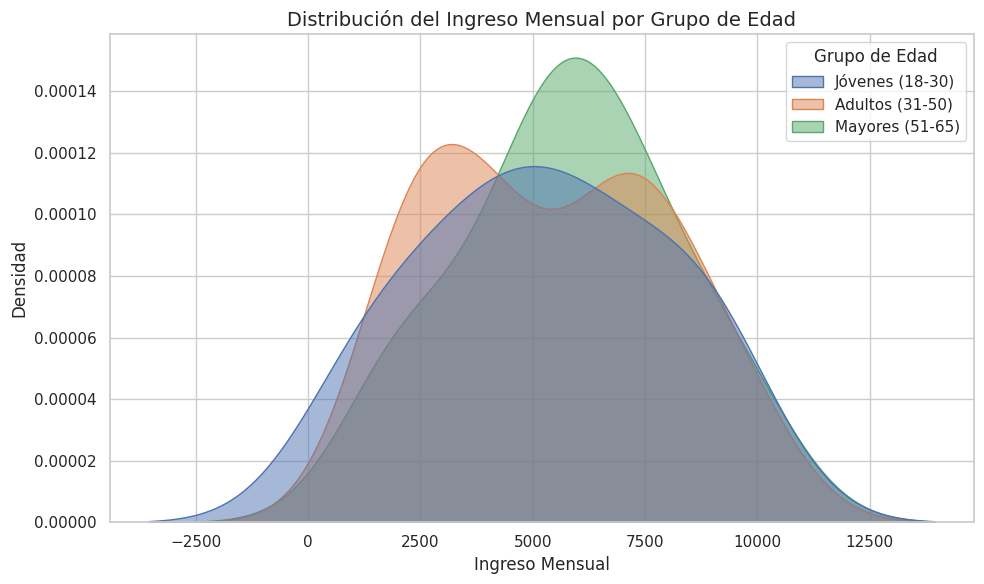

In [ ]:
# Estilo del gráfico
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Gráfico KDE diferenciado por grupo
sns.kdeplot(
    data=df,
    x="Ingreso Mensual",
    hue="Grupo de Edad",
    fill=True,        # rellena el área bajo la curva
    common_norm=False,
    alpha=0.5,

    legend=True  # deja que Seaborn cree la leyenda
)

# Personalización del gráfico
plt.title("Distribución del Ingreso Mensual por Grupo de Edad", fontsize=14)
plt.xlabel("Ingreso Mensual")
plt.ylabel("Densidad")

plt.tight_layout()

# Mostrar gráfico
plt.show()


Grupo de Edad
Adultos (31-50)    26
Jóvenes (18-30)    17
Mayores (51-65)    16
NaN                 1
Name: count, dtype: int64
